# Demo of LiSET Clusters - Basic functionality

The Lifecycle Screening of Emerging Technologies (LiSET) requires the combination of quantiative and qualitative indicators, and a rapid overview of environmental hotspots, potential strenghts and relative weaknesses of a large number of technologies. 

This small module aims to facilitate this process. It regroups quantitative data in a finite number of clusters, for easy combination with qualitative data.

## Imports and demo data


In [1]:
# The usual imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# the LiSET cluster module
import liset_clusters as lc


In [2]:
# Data for the demo

candidates = ['tech{}'.format(i) for i in range(9)]

# Data vector with a moderate range
moderate_spread = pd.Series([
1.8510039,
1.9076962,
2.4,
2.5123298,
2.6671771,
4.8501761,
6.65,
6.85,
9.2784423,], candidates)

# Data vector with a spread over multiple orders of magnitude
large_spread = pd.Series([
3.67647058823529,
36.231884057971,
10101.0101010101,
34482.7586206897,
55555.5555555556,
66666666.6666667,
80000000,
250000000,
10000000000,
], index=candidates)

# Tabular data
liset_tbl = pd.DataFrame([[11., 22., 66., 11.], 
                          [2., 7., 1., ]], 
                         ['Aspect 1', 'Aspect 2'], ['TechA', 'TechB', 'TechC', 'TechD'])

## Moderate spread

Let us have 8 different technologies, competing in terms of a lifecycle aspect (e.g., energy requirements). This data presents a moderate spread (within one order of magnitude).

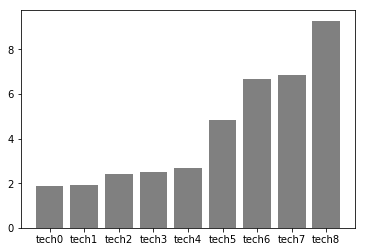

In [3]:
graph = plt.bar(candidates, moderate_spread, color='gray')

We want to regroup these technologies in three groups (green, yellow, and red). We rely on Jenks break clustering alogorithm to decide where to put the boundary between each group.

In [4]:
lc.cluster_vector(moderate_spread)

tech0     green
tech1     green
tech2     green
tech3     green
tech4     green
tech5    yellow
tech6    yellow
tech7    yellow
tech8       red
dtype: object

We can define categories as we want, numeric or string

In [5]:
lc.cluster_vector(moderate_spread, categories=[0,1,2])

tech0    0.0
tech1    0.0
tech2    0.0
tech3    0.0
tech4    0.0
tech5    1.0
tech6    1.0
tech7    1.0
tech8    2.0
dtype: float64

In [6]:
lc.cluster_vector(moderate_spread, categories=['theGood', 'theBad', 'theUgly'])

tech0    theGood
tech1    theGood
tech2    theGood
tech3    theGood
tech4    theGood
tech5     theBad
tech6     theBad
tech7     theBad
tech8    theUgly
dtype: object

This can also be represented graphically with the cluster plotting function.

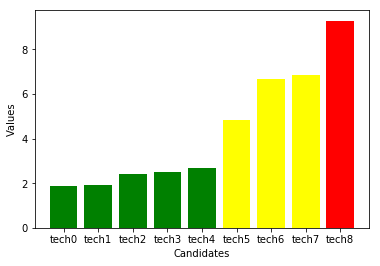

In [7]:
fig = lc.cluster_vector_plot(moderate_spread, labels=candidates)

We can have any number of categories, as long as there are more technology candidates than there are categories

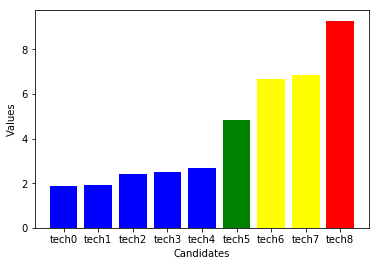

In [8]:
fig = lc.cluster_vector_plot(moderate_spread, 
                             labels=candidates, 
                             categories=['blue', 'green', 'yellow', 'red'])

## Large spread - Log Scale

The different technologies can present lifecycle aspects that span multiple orders of magnitude, such as ecotoxicity impacts of its material requirements. For example, let us have:

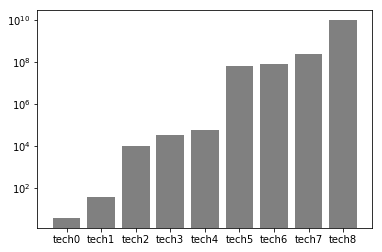

In [9]:
fig = plt.bar(candidates, large_spread, color='gray', log=True)


With such a distribution, the clustering of the data will be dwarfed by the two worst emitters, which will invariably monopolize the worst and second-worst categories, leaving all other options relatively "green".

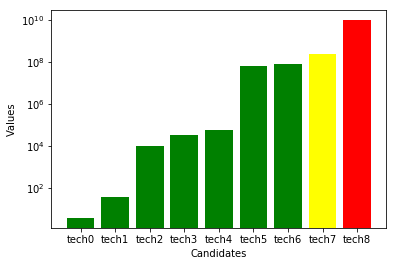

In [10]:
fig = lc.cluster_vector_plot(large_spread, plot_scale='log')

Yet, there are multiple orders of magnitudes of difference between the best green and the worst green. To give more weight to these important differences between low-impact candidates, we perform the clustering on the log10 of the data.

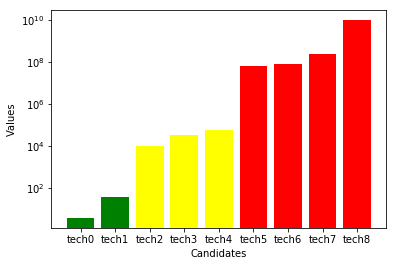

In [11]:
fig = lc.cluster_vector_plot(large_spread, scale='log')

## LiSET cluster of a matrix

Technologies present multiple lifecycle aspects, enabling a tabular comparison. Note that some data could not be acquired for technology D.

In [12]:
liset_tbl

,TechA,TechB,TechC,TechD
Aspect 1,11.0,22.0,66.0,11.0
Aspect 2,2.0,7.0,1.0,NaN


We can cluster this data along each aspect. Note that the missing data is clearly marked with a white color code.

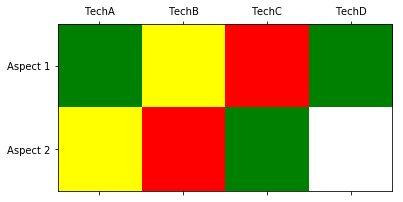

In [13]:
fig = lc.cluster_matrix_plot(liset_tbl)